<a href="https://colab.research.google.com/github/AntonioWh1te/The-Journey/blob/main/Phase_2_Fetching_and_Visualizing_Historical_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This lesson will focus on setting up an environment and wirtnig a simple script to fetch historical stock data and visualize it.

# Objectives
1.   **Set up the environment:** Install and import the required libraries.
2.   **Fetch Data:** Use yfinance to download historical data for a few stocks.
3.   **Visualize data:** Plot the adjusted closing prices using matplotlib.

# Libraries


1.   **yfinance:** a python library that allows me to fetch financial data from Yahoo Finance.
  * Downloads historical market data like stock prices, volumes, and dividends.
  * Ideal for backtesting trading strategies and financial research
2. **pandas:** A python library for data manipulation and analysis.
  * Introduces the DataFrame structure, which is great for handling tabular data.
  * Simplifies tasks such as cleaning, filtering, and transforming data.
  * Supports reading/writing data from formats like CSV, Excel, SQL, and more.
3. **matplotlib:** Versatile python library for creating static, animated, and interactive visualizations.
  * Uses pyplot module for a MATLAB-like plotting experience.
  * Easily creates line plots, bar charts, scatter plots, histograms, and more.
  

In [8]:
# The "!" tells my notebook to execute the command as a shell command rather than a python statement. This allows me to run terminal commands directly from a cell
!pip install yfinance

# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [24]:
# A few common companies and the S&P 500 ETF ticker symbols
tickers = ['AAPL', 'TSLA', 'SPY']

#Define the date range
Begin = '2020-01-01'
End = '2025-01-01'

# Download historical adjusted closing prices
# yf.download is a function provided by the yfinance library, and I am calling that function.
data = yf.download(tickers, start = Begin, end = End)

#Display the first few rows to verify the data
data.head()


[*********************100%***********************]  3 of 3 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['AAPL', 'SPY', 'TSLA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Adj Close, SPY), (Adj Close, TSLA), (Close, AAPL), (Close, SPY), (Close, TSLA), (High, AAPL), (High, SPY), (High, TSLA), (Low, AAPL), (Low, SPY), (Low, TSLA), (Open, AAPL), (Open, SPY), (Open, TSLA), (Volume, AAPL), (Volume, SPY), (Volume, TSLA)]
Index: []

In [13]:
data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

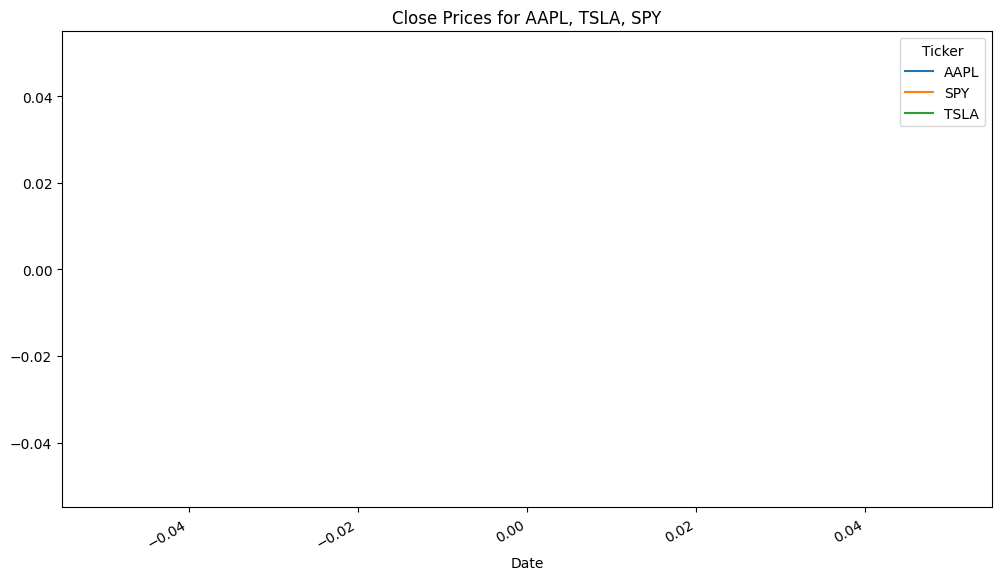

In [14]:
# Pulling the Close level, which contains sub-columns for each ticker and plots them all on one graph.
data['Close'].plot(figsize=(12, 7))
plt.title("Close Prices for AAPL, TSLA, SPY")
plt.show()

API = Application Programming Interface (Connects apps)


I will now begin using Financial Modeling Prep (FMP) instead of yfinance because I Want reliable, consistent data extraction.

# Fetching and Visualizing Financial Data with FMP

* Connect to FMP: Use my API key to authenticate and retrieve data.
* Fetch data: Retrieve the income statement for a chosen ticker.
* Data Wrangling: Convert the JSON response into a Pandas DataFrame, process datesm and set the index.
* Exploration: Understand how to inspect and modify the data, setting me up for deeper analysis later.

Enter your API Key here··········
[{'date': '2024-09-28', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'cik': '0000320193', 'fillingDate': '2024-11-01', 'acceptedDate': '2024-11-01 06:01:36', 'calendarYear': '2024', 'period': 'FY', 'revenue': 391035000000, 'costOfRevenue': 210352000000, 'grossProfit': 180683000000, 'grossProfitRatio': 0.4620634982, 'researchAndDevelopmentExpenses': 31370000000, 'generalAndAdministrativeExpenses': 0, 'sellingAndMarketingExpenses': 0, 'sellingGeneralAndAdministrativeExpenses': 26097000000, 'otherExpenses': 0, 'operatingExpenses': 57467000000, 'costAndExpenses': 267819000000, 'interestIncome': 0, 'interestExpense': 0, 'depreciationAndAmortization': 11445000000, 'ebitda': 134661000000, 'ebitdaratio': 0.3443707085, 'operatingIncome': 123216000000, 'operatingIncomeRatio': 0.3151022287, 'totalOtherIncomeExpensesNet': 269000000, 'incomeBeforeTax': 123485000000, 'incomeBeforeTaxRatio': 0.3157901467, 'incomeTaxExpense': 29749000000, 'netIncome': 93736000000, 'ne

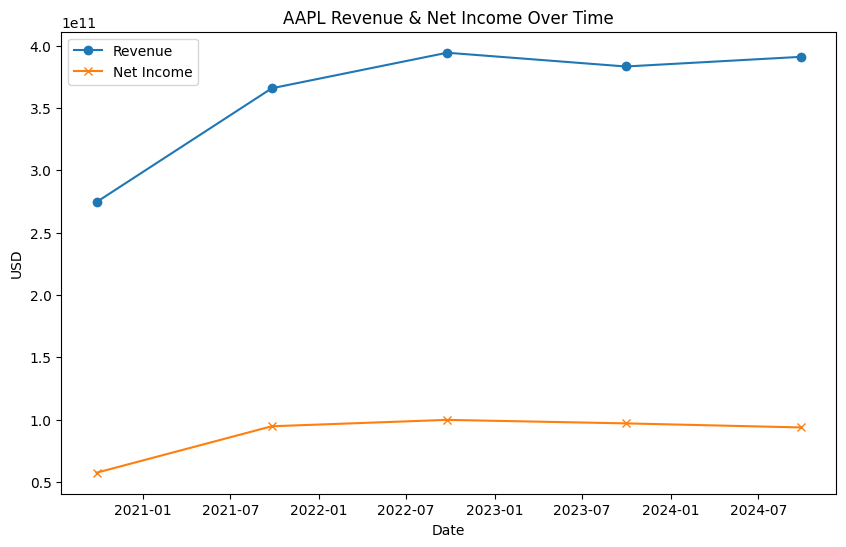

In [30]:
import getpass
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prompt for my Financial Modeling Prep (FMP) key so it won't show on screen
fmp = getpass.getpass("Enter your API Key here")

# Set the ticker symbol and build the URL for the income statement endpoint.
ticker = "AAPL"
url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?apikey={fmp}&limit = 5"

# Make the API call using request.get(), then inspect the raw JSON data to understand its structure.
response = requests.get(url)
data_json = response.json()

# Inspect the raw JSON
print(data_json)

# Convert the list to a dataframe
df = pd.DataFrame(data_json)

# Convert 'date' to determine and set as index if available
if 'date' in df.columns:
  df['date'] = pd.to_datetime(df['date'])
  df.set_index('date', inplace=True)

# Check if both 'revenue' and 'netIncome' exist in the DataFrame
if 'revenue' in df.columns and 'netIncome' in df.columns:
  plt.figure(figsize=(10, 6))
  plt.plot(df.index, df['revenue'], marker='o', label='Revenue')
  plt.plot(df.index, df['netIncome'], marker='x', label='Net Income')
  plt.title(f"{ticker} Revenue & Net Income Over Time")
  plt.xlabel("Date")
  plt.ylabel("USD")
  plt.legend()
  plt.show()
else:
  print("Required columns ('revenue' or 'netIncome') not found in the data.")


Enter your FMP API key: ··········
[{'date': '2024-09-28', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'cik': '0000320193', 'fillingDate': '2024-11-01', 'acceptedDate': '2024-11-01 06:01:36', 'calendarYear': '2024', 'period': 'FY', 'revenue': 391035000000, 'costOfRevenue': 210352000000, 'grossProfit': 180683000000, 'grossProfitRatio': 0.4620634982, 'researchAndDevelopmentExpenses': 31370000000, 'generalAndAdministrativeExpenses': 0, 'sellingAndMarketingExpenses': 0, 'sellingGeneralAndAdministrativeExpenses': 26097000000, 'otherExpenses': 0, 'operatingExpenses': 57467000000, 'costAndExpenses': 267819000000, 'interestIncome': 0, 'interestExpense': 0, 'depreciationAndAmortization': 11445000000, 'ebitda': 134661000000, 'ebitdaratio': 0.3443707085, 'operatingIncome': 123216000000, 'operatingIncomeRatio': 0.3151022287, 'totalOtherIncomeExpensesNet': 269000000, 'incomeBeforeTax': 123485000000, 'incomeBeforeTaxRatio': 0.3157901467, 'incomeTaxExpense': 29749000000, 'netIncome': 93736000000, 'n

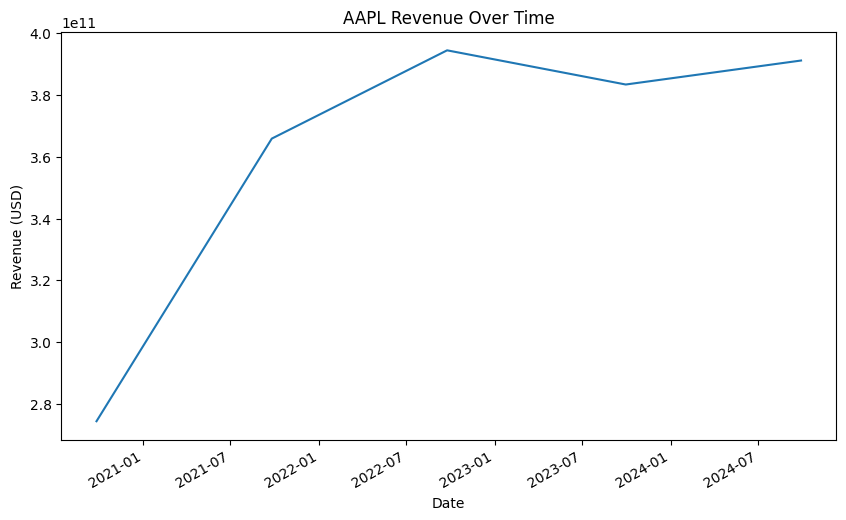

In [29]:
import getpass
import requests
import pandas as pd
import matplotlib.pyplot as plt

fmp = getpass.getpass("Enter your FMP API key: ")

ticker = "AAPL"
url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?apikey={fmp}&limit=5"

response = requests.get(url)
data_json = response.json()

# 1) Inspect the raw JSON
print(data_json)  # Expect a list of dicts

# 2) Convert the list to a DataFrame
df = pd.DataFrame(data_json)

# 3) Check available columns
# print(df.columns)

# 4) Convert 'date' to datetime if present, then set as index
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

# 5) Plot something relevant to an income statement (e.g., 'revenue' or 'netIncome')
if 'revenue' in df.columns:
    df['revenue'].plot(figsize=(10, 6), title=f"{ticker} Revenue Over Time")
    plt.xlabel("Date")
    plt.ylabel("Revenue (USD)")
    plt.show()
else:
    print("No 'revenue' column found in the data.")
